# 🛍️ Customer Behavior Analysis & Segmentation with SuperStore Data

## 📘 Introduction

Understanding customer behavior is critical for optimizing marketing, targeting, and operations. This notebook explores the SuperStore dataset to uncover behavioral patterns, segment customers, and simulate purchase activities with the goal of informing data-driven strategies.

We perform exploratory data analysis, feature engineering, clustering, and advanced behavior modeling, including generating synthetic transaction-level data.

## 🎯 Objectives

- Clean and preprocess customer data
- Engineer new features such as `age`, `income group`, and `preferred channel`
- Handle missing values via linear regression
- Perform exploratory analysis and identify key insights
- Use **KMeans clustering** to segment customers by behavior
- Simulate product-level purchase transactions using category preferences
- Visualize spending habits, return rates, and satisfaction by segment and location

Let's begin by importing the necessary libraries and loading the dataset.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('SuperStore-Data.csv')
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,D,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,S,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,M,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,T,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,S,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [ ]:
# creating age feature and placing next to year_birth column
df['age']=2022-df.Year_Birth

cols = df.columns.tolist()
cols

year_birth_index = cols.index('Year_Birth')
year_birth_index

df['age']=2022-df.Year_Birth

cols = df.columns.tolist()
cols

year_birth_index = cols.index('Year_Birth')
year_birth_index

cols.insert(year_birth_index + 1, 'age')

cols.pop(-1)
cols

df = df[cols]
df


,Id,Year_Birth,age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,52,Graduation,D,84835.0,0,0,6/16/2014,0,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,61,Graduation,S,57091.0,0,0,6/15/2014,0,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,64,Graduation,M,67267.0,0,1,5/13/2014,0,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,55,Graduation,T,32474.0,1,1,11/5/2014,0,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,33,Graduation,S,21474.0,1,0,8/4/2014,0,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,10142,1976,46,PhD,D,66476.0,0,1,7/3/2013,99,...,47,48,78,2,5,2,11,4,0,0
2234,5263,1977,45,2n Cycle,M,31056.0,1,0,1/22/2013,99,...,3,8,16,1,1,0,3,8,0,0
2235,22,1976,46,Graduation,D,46310.0,1,0,3/12/2012,99,...,15,5,14,2,6,1,5,8,0,0
2236,528,1978,44,Graduation,M,65819.0,0,0,11/29/2012,99,...,149,165,63,1,5,4,10,3,0,0


In [ ]:
# outcasting outliers in age feature
pd.cut(df.age,bins=10).value_counts()

df['age'] = df.loc[df.age < 90, 'age']
df.age.fillna(df.age.mean(), inplace=True)


<ipython-input-219-6ea4f5e96377>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.age.fillna(df.age.mean(), inplace=True)


In [ ]:
#mapping education
df['educ_numeric']=df['Education'].map({'Basic':1,'2n Cycle':3,'Graduation':2,'Master':4,'PhD':5})

In [ ]:
df.columns

Index(['Id', 'Year_Birth', 'age', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'educ_numeric'],
      dtype='object')

In [ ]:
income_nan=df[df['Income'].isna()]
income_nan

,Id,Year_Birth,age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,educ_numeric
132,8996,1957,65.0,PhD,M,NaN,2,1,11/19/2012,4,...,37,53,12,7,2,8,9,0,0,5
260,1994,1983,39.0,Graduation,M,NaN,1,0,11/15/2013,11,...,2,1,1,1,0,2,7,0,0,2
392,3769,1972,50.0,PhD,T,NaN,1,0,2/3/2014,17,...,0,3,1,1,0,3,7,0,0,5
447,5255,1986,36.0,Graduation,S,NaN,1,0,2/20/2013,19,...,263,362,0,27,0,0,1,0,0,2
523,8268,1961,61.0,PhD,M,NaN,0,1,11/7/2013,23,...,0,15,3,6,1,7,6,0,0,5
588,10629,1973,49.0,2n Cycle,M,NaN,1,0,9/14/2012,25,...,4,17,3,3,0,3,8,0,0,3
897,10475,1970,52.0,Master,T,NaN,0,1,1/4/2013,39,...,20,14,2,4,2,6,5,0,0,4
995,9235,1957,65.0,Graduation,S,NaN,1,1,5/27/2014,45,...,0,1,1,1,0,2,7,0,0,2
1094,4345,1964,58.0,2n Cycle,S,NaN,1,1,12/1/2014,49,...,0,4,1,1,0,2,7,0,0,3
1183,7187,1969,53.0,Master,T,NaN,1,1,5/18/2013,52,...,66,96,7,4,10,4,3,0,0,4


In [ ]:
#imputing income with autoregression on age, education and high cost purchases
from sklearn.linear_model import LinearRegression

df_train = df[df['Income'].notna()]
df_missing = df[df['Income'].isna()]
model = LinearRegression()
model.fit(df_train[['age', 'educ_numeric','MntWines','MntMeatProducts','MntGoldProds']], df_train['Income'])

df_missing['Income'] = model.predict(df_missing[['age', 'educ_numeric','MntWines','MntMeatProducts','MntGoldProds']]) # Changed this line to use existing features

df = pd.concat([df_train, df_missing])

<ipython-input-223-d8af887e7bbe>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing['Income'] = model.predict(df_missing[['age', 'educ_numeric','MntWines','MntMeatProducts','MntGoldProds']]) # Changed this line to use existing features


In [ ]:
df_missing

,Id,Year_Birth,age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,educ_numeric
132,8996,1957,65.0,PhD,M,55438.211260,2,1,11/19/2012,4,...,37,53,12,7,2,8,9,0,0,5
260,1994,1983,39.0,Graduation,M,33543.993940,1,0,11/15/2013,11,...,2,1,1,1,0,2,7,0,0,2
392,3769,1972,50.0,PhD,T,38558.952419,1,0,2/3/2014,17,...,0,3,1,1,0,3,7,0,0,5
447,5255,1986,36.0,Graduation,S,44114.441400,1,0,2/20/2013,19,...,263,362,0,27,0,0,1,0,0,2
523,8268,1961,61.0,PhD,M,49392.591939,0,1,11/7/2013,23,...,0,15,3,6,1,7,6,0,0,5
588,10629,1973,49.0,2n Cycle,M,38690.970727,1,0,9/14/2012,25,...,4,17,3,3,0,3,8,0,0,3
897,10475,1970,52.0,Master,T,44640.706415,0,1,1/4/2013,39,...,20,14,2,4,2,6,5,0,0,4
995,9235,1957,65.0,Graduation,S,38649.892774,1,1,5/27/2014,45,...,0,1,1,1,0,2,7,0,0,2
1094,4345,1964,58.0,2n Cycle,S,38091.711375,1,1,12/1/2014,49,...,0,4,1,1,0,2,7,0,0,3
1183,7187,1969,53.0,Master,T,51134.462884,1,1,5/18/2013,52,...,66,96,7,4,10,4,3,0,0,4


<Axes: ylabel='Frequency'>

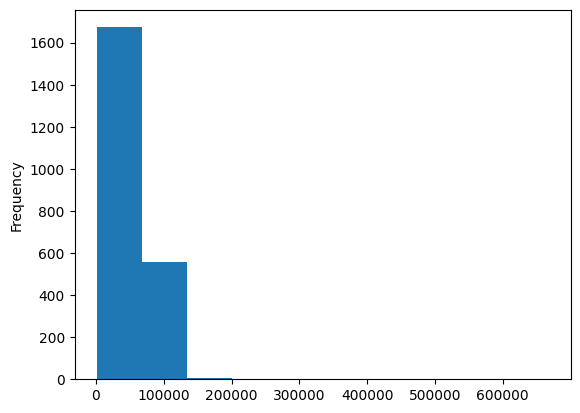

In [ ]:
df.Income.plot(kind='hist')

In [ ]:
df.shape

(2238, 24)

In [ ]:
#creating a function to remove outliers

def remove_outliers_iqr(data, column):


  Q1 = df.Income.quantile(0.25)
  Q3 = df.Income.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
  return filtered_data



In [ ]:
# segmenting 50% quantilr
df=remove_outliers_iqr(df, "Income")
df=remove_outliers_iqr(df, "age")

In [ ]:
df.isna().sum()
df.shape

(2230, 24)

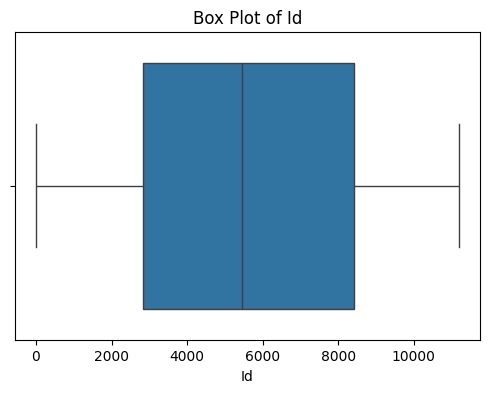

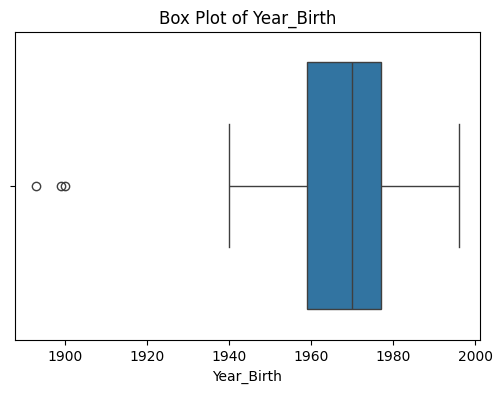

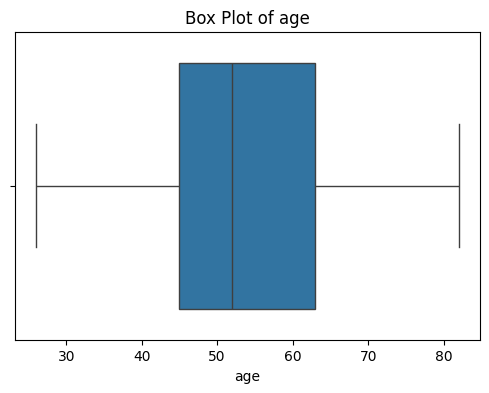

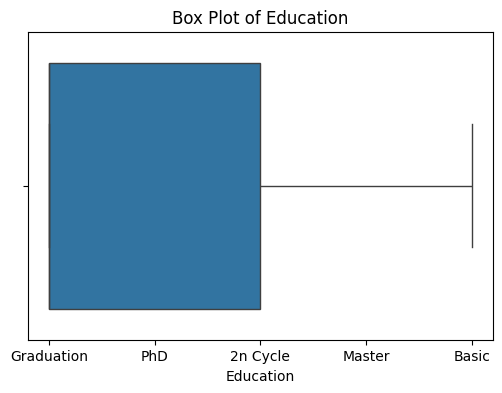

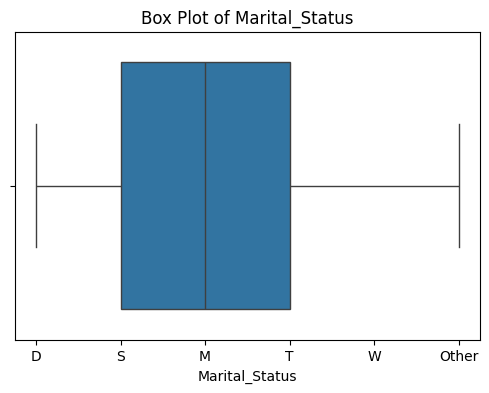

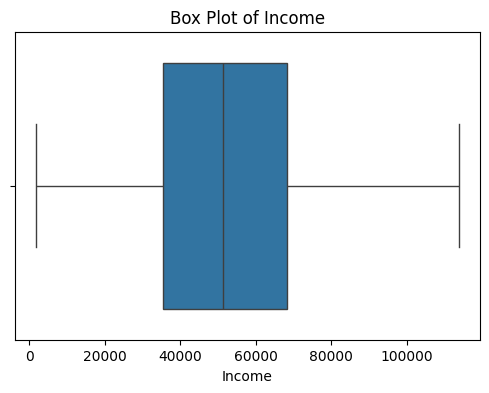

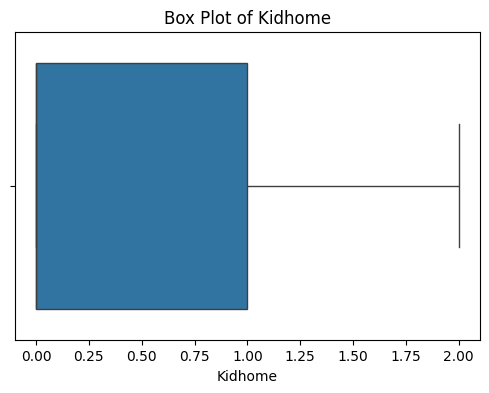

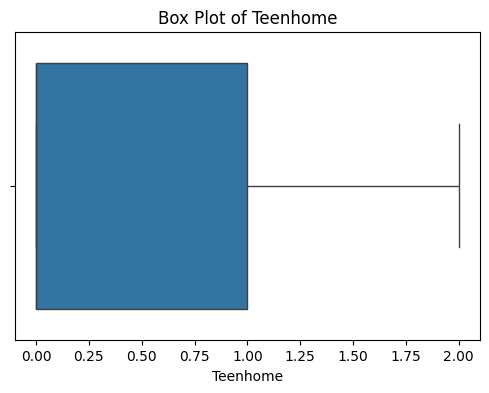

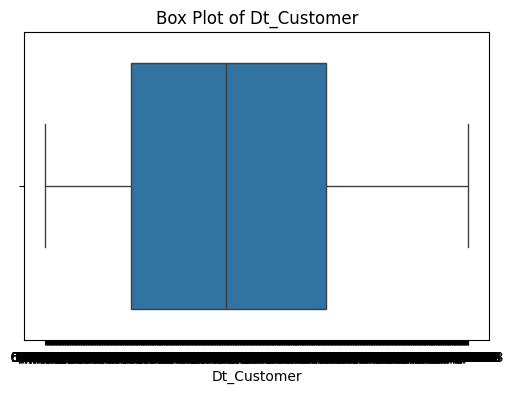

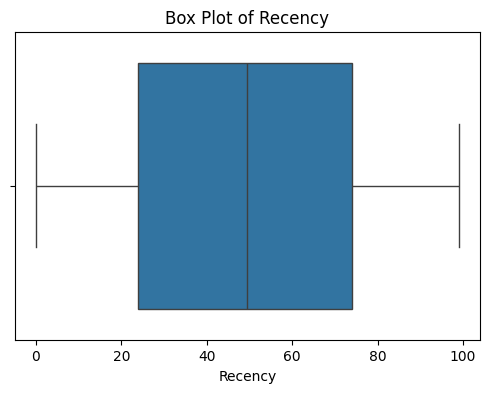

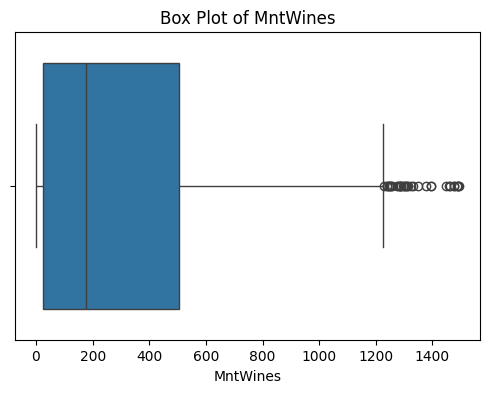

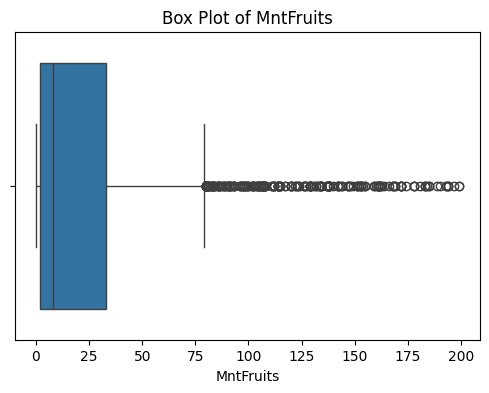

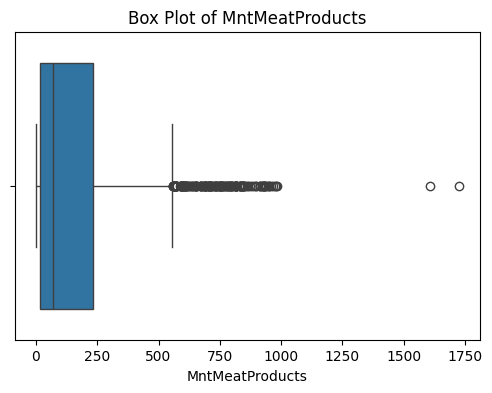

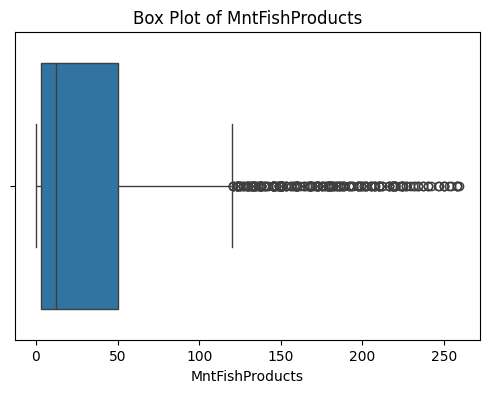

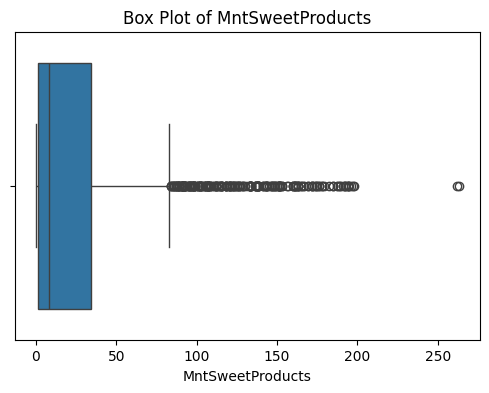

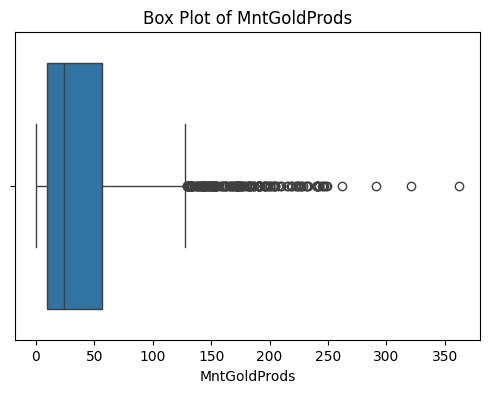

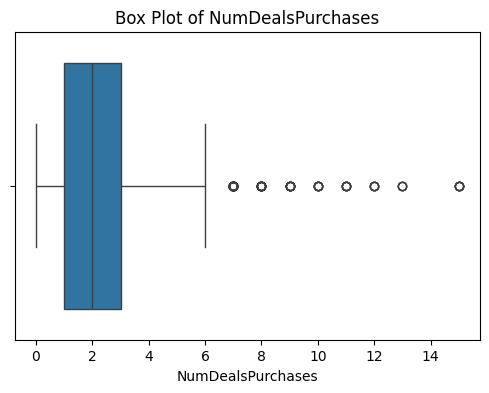

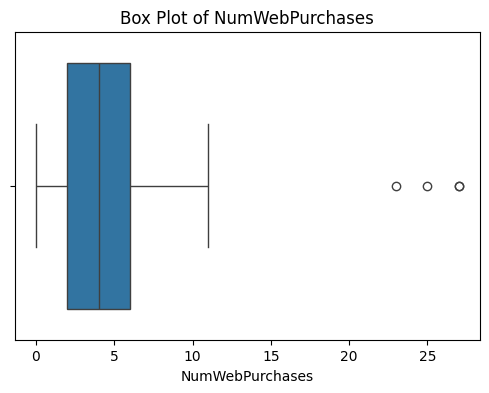

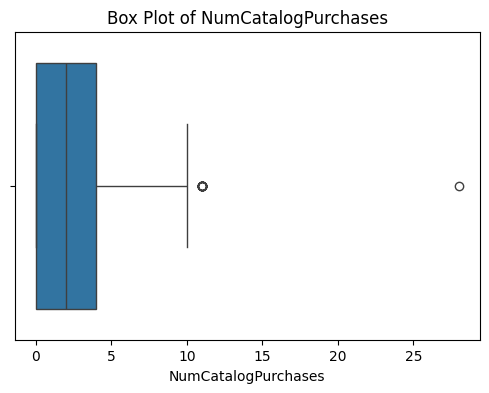

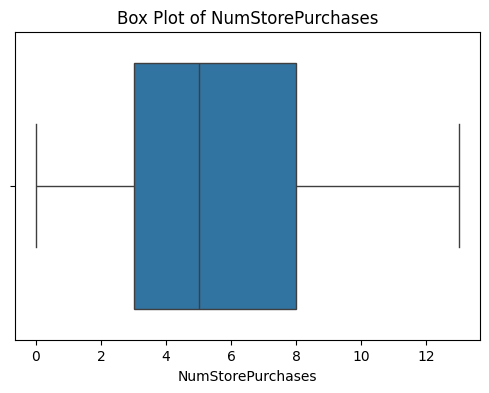

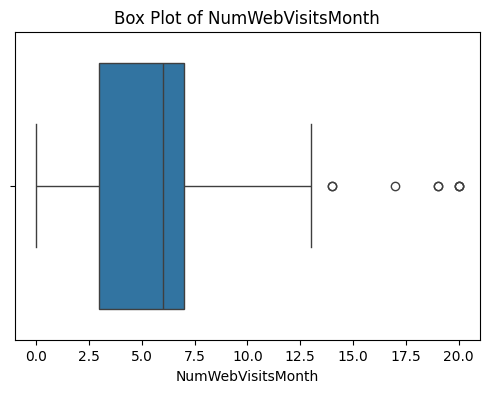

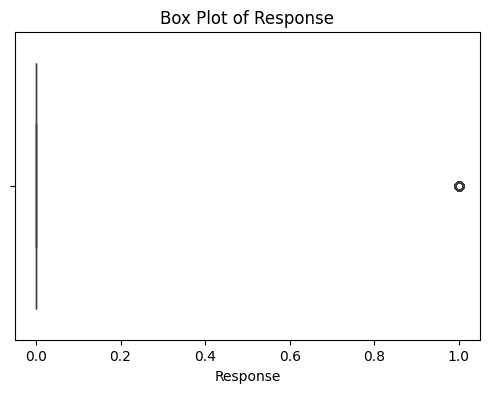

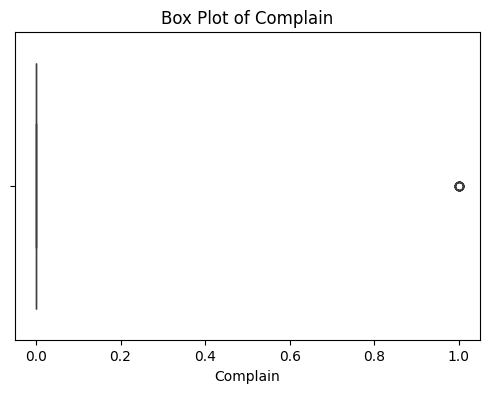

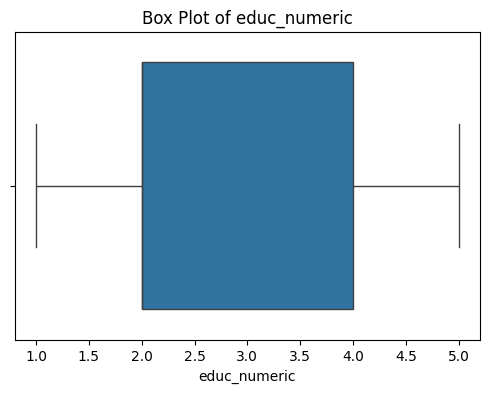

In [ ]:

# Loop through all columns for outliers
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Box Plot of {column}")
    plt.show()

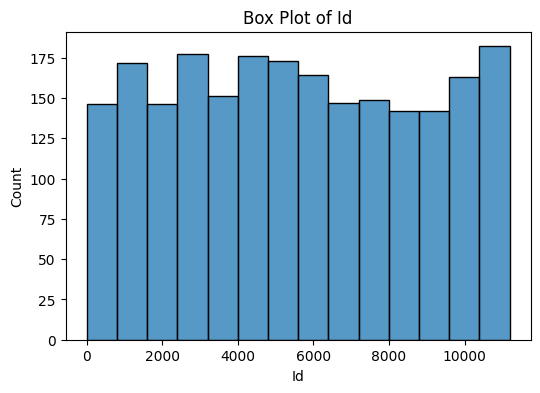

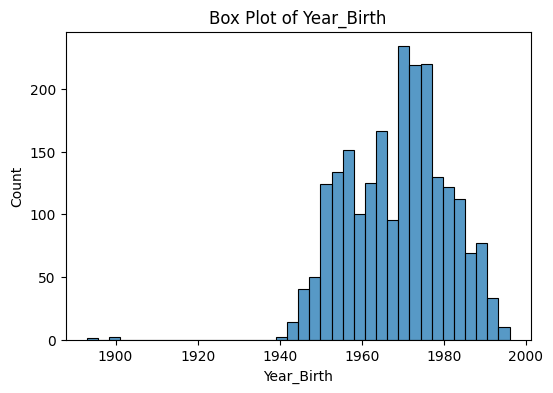

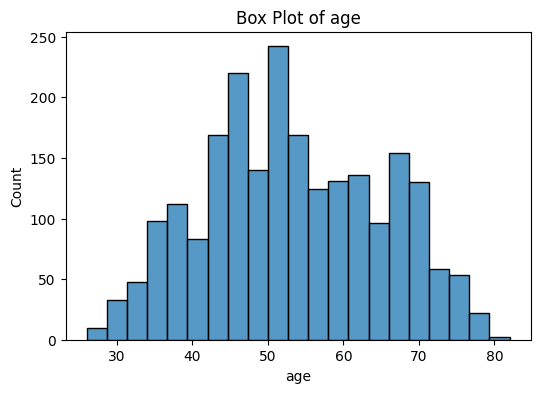

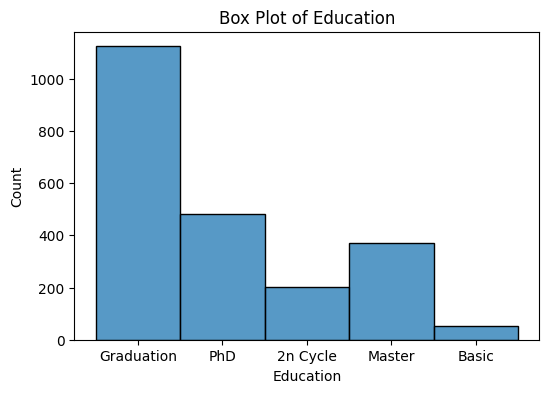

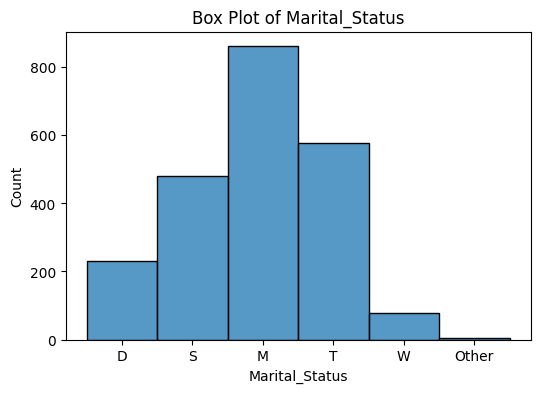

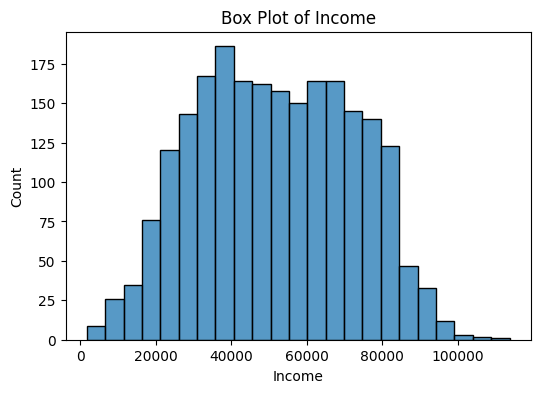

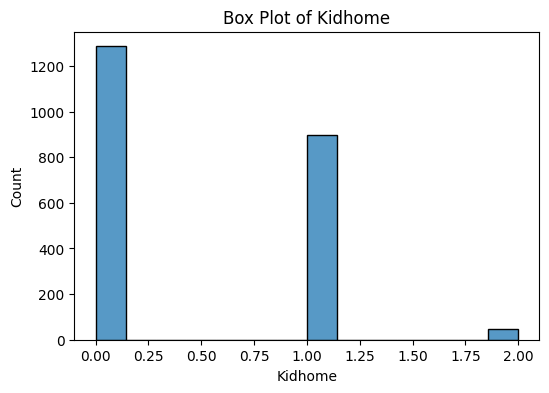

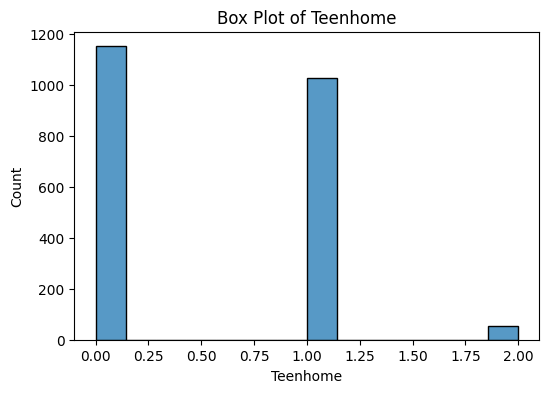

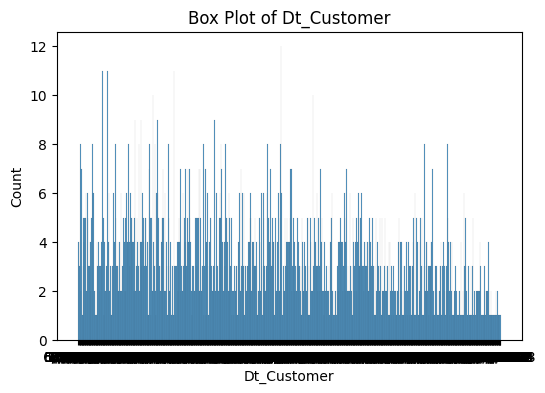

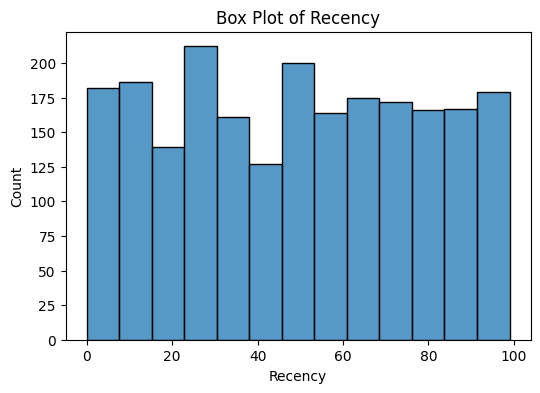

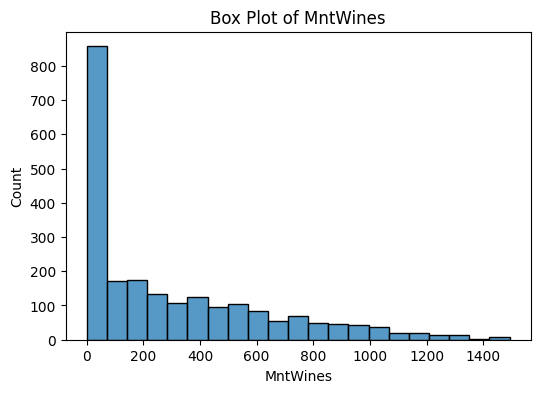

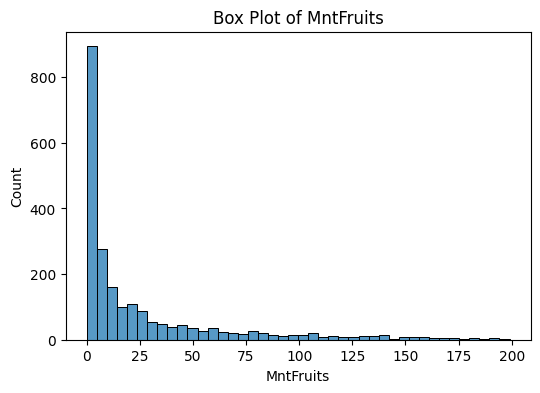

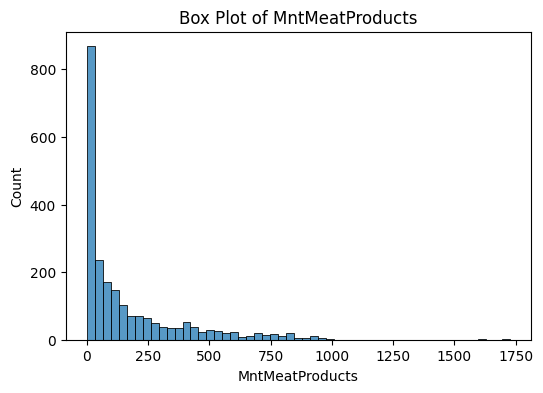

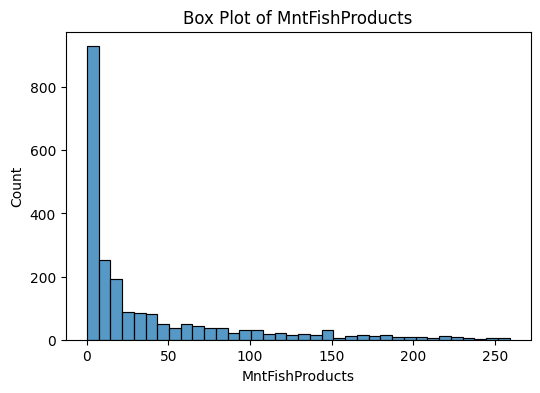

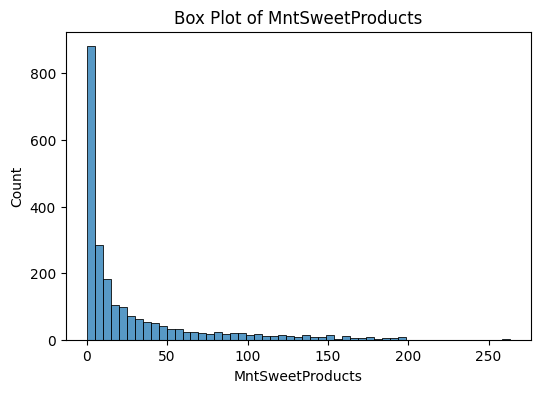

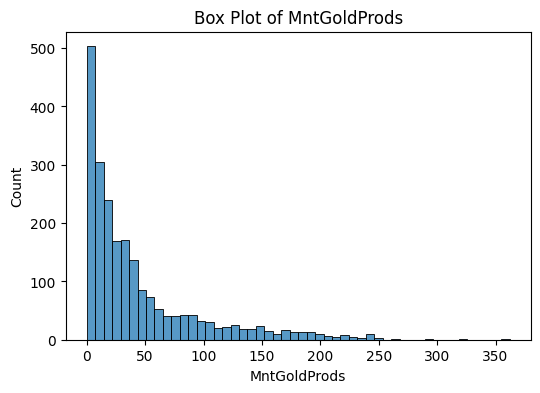

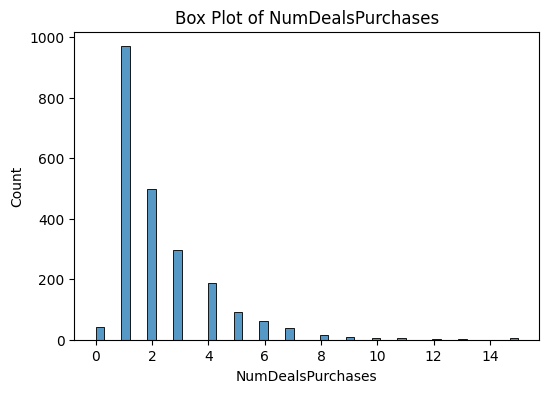

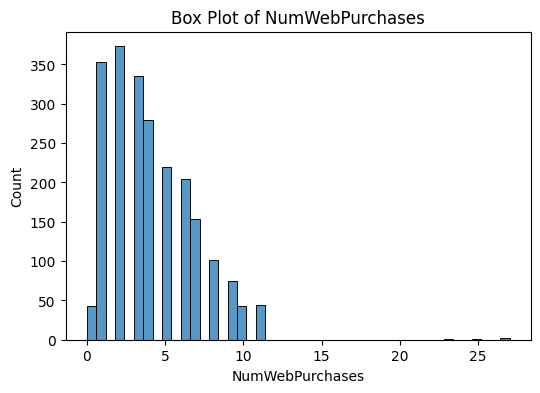

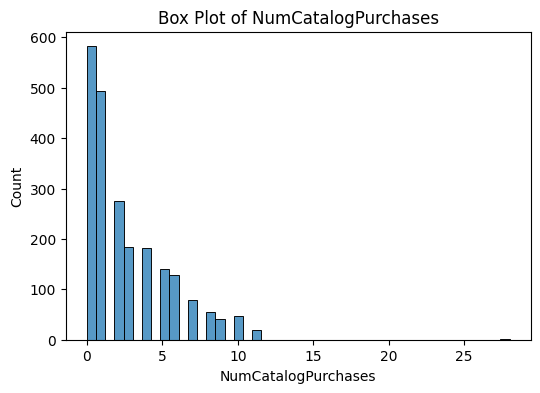

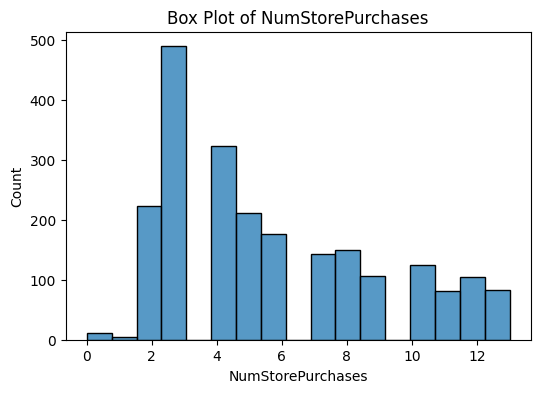

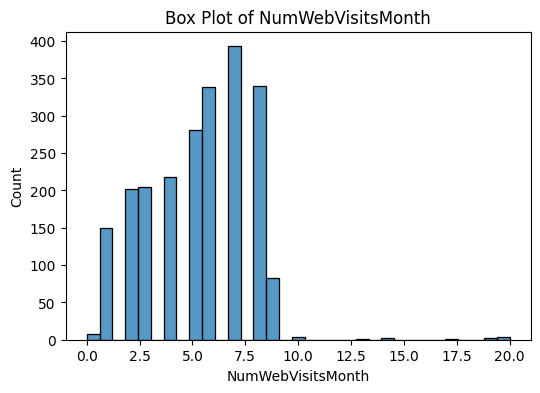

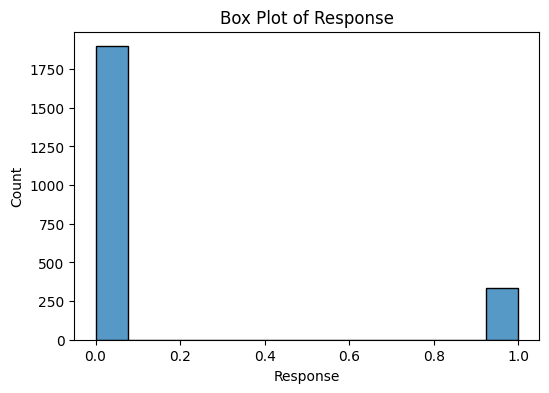

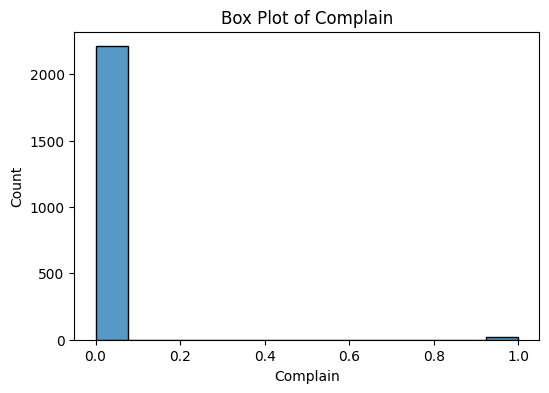

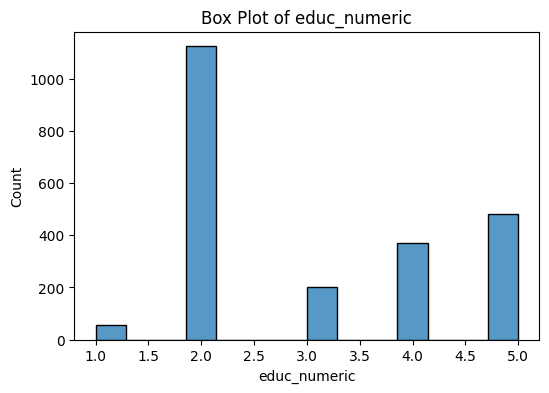

In [ ]:
# Loop through all columns in the DataFrame for distribution

for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(x=df[column])
    plt.title(f"Box Plot of {column}")
    plt.show()

<Axes: xlabel='Marital_Status'>

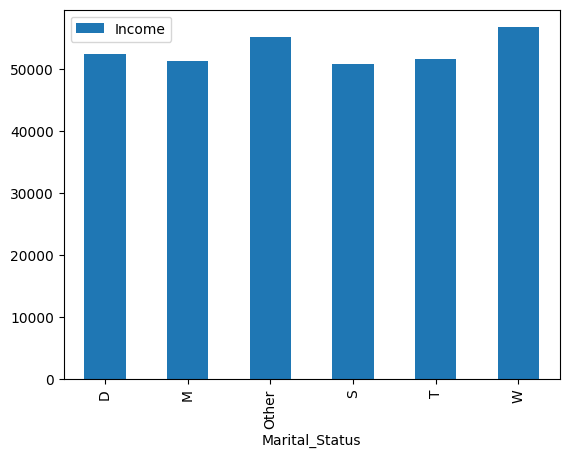

In [ ]:
# INcome distribution over marital status
df.pivot_table(index='Marital_Status', values='Income', aggfunc='mean').plot(kind='bar')

In [ ]:
df.columns

Index(['Id', 'Year_Birth', 'age', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'educ_numeric'],
      dtype='object')

In [ ]:
#Analyzing purchase of products with education level
product_total=df[['MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']]
df.pivot_table(index='Education', values=product_total, aggfunc='sum')#.plot(kind='bar')

,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Education,,,,,,
2n Cycle,9639,5878,9419,28675,6953,40231
Basic,921,600,1233,618,654,391
Graduation,48619,34668,57293,200540,35348,320360
Master,11875,8011,14939,60441,7835,123199
PhD,12961,9718,15611,78619,9815,195779


In [ ]:
#Establishing numer of kids per household

df['TotalChildren'] = df['Kidhome'] + df['Teenhome']
df['TotalSpend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
#creating kids status per household

df['FamilyStatus'] = df['TotalChildren'].apply(lambda x: 'NoKids' if x == 0 else 'WithKids')

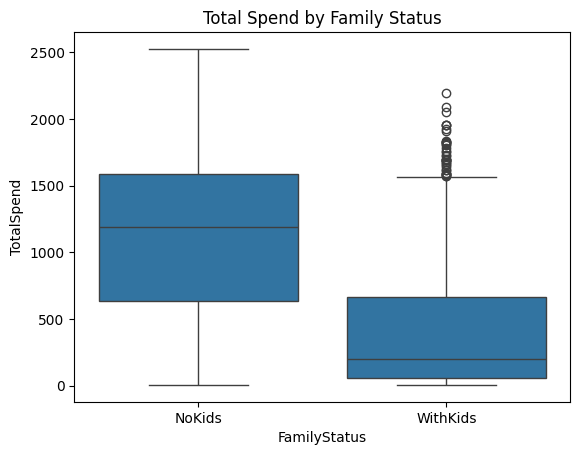

In [ ]:
#comparing total spend by family status
sns.boxplot(data=df, x='FamilyStatus', y='TotalSpend')
plt.title("Total Spend by Family Status")
plt.show()

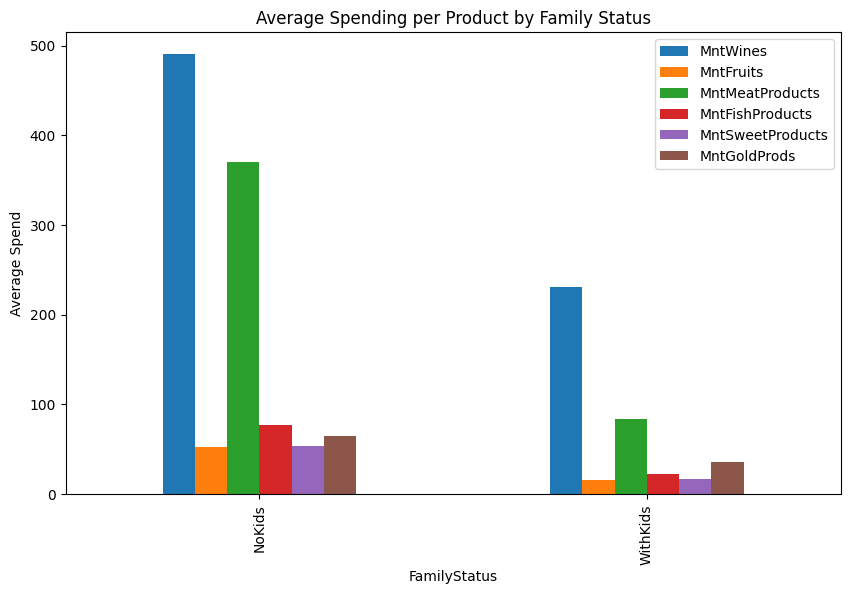

In [ ]:
#comapre spending by product category

product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts',
                   'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df.groupby('FamilyStatus')[product_columns].mean().plot(kind='bar', figsize=(10,6))
plt.title("Average Spending per Product by Family Status")
plt.ylabel("Average Spend")
plt.show()


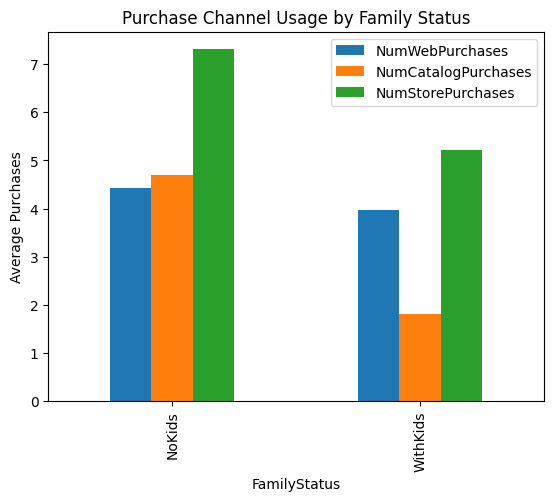

In [ ]:
channel_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

df.groupby('FamilyStatus')[channel_columns].mean().plot(kind='bar')
plt.title("Purchase Channel Usage by Family Status")
plt.ylabel("Average Purchases")
plt.show()


In [ ]:
df.TotalChildren.value_counts()

,count
TotalChildren,
1,1123
0,634
2,420
3,53


In [ ]:
#cheacking if there is difference in ave spending among customer with/no kids
from scipy.stats import ttest_ind

no_kids = df[df['TotalChildren'] == 0]['TotalSpend']
with_kids = df[df['TotalChildren'] > 0]['TotalSpend']

t_stat, p_val = ttest_ind(no_kids, with_kids)
print(f"T-test result: p = {p_val:.4f}")

#The difference in means between TotalSpend for customers with and without kids is statistically significant.
#the null hypothesis that "there is no difference" is rejected

T-test result: p = 0.0000


In [ ]:
print("NoKids count:", len(no_kids))
print("WithKids count:", len(with_kids))
print("NoKids mean:", no_kids.mean(), "| std:", no_kids.std())
print("WithKids mean:", with_kids.mean(), "| std:", with_kids.std())


NoKids count: 634
WithKids count: 1596
NoKids mean: 1107.5488958990536 | std: 643.1425671998668
WithKids mean: 406.4266917293233 | std: 449.37044811402745


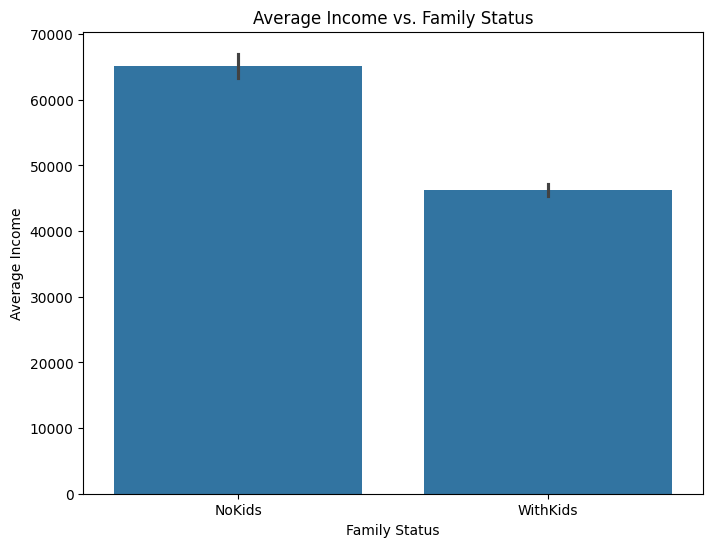

In [ ]:
# comparing average income vs family status


plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='FamilyStatus', y='Income')
plt.title('Average Income vs. Family Status')
plt.xlabel('Family Status')
plt.ylabel('Average Income')
plt.show()


In [ ]:
# with kids segment likely more price sensitive
# lower spend indicates, budget-conscious behavior, focus on essentials, not luxury (e.g., wine, gold products)
# and/or less disposable income

In [ ]:

#customer segmentation for spending habits and purchase beahviour

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


features = ['Income', 'age', 'Recency',
            'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds',
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

X = df[features].copy()

#normalize for kmeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# apply clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

#explore labeling
cluster_profiles = df.groupby('Cluster')[features].mean()
print(cluster_profiles)



               Income        age    Recency    MntWines  MntFruits  \
Cluster                                                              
0        34410.510648  49.387791  24.295575   49.520354   4.794690   
1        75115.000482  53.234074  50.694291  594.627993  75.110497   
2        60746.075991  57.253012  47.786575  517.938038  21.148021   
3        36207.251998  52.443811  75.031423   52.081331   5.719039   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0              23.451327         7.943363          4.672566     16.109735   
1             458.412523       108.031308         77.104972     83.416206   
2             157.480207        28.772806         22.213425     60.597246   
3              28.149723         7.669131          5.898336     16.434381   

         NumWebPurchases  NumCatalogPurchases  NumStorePurchases  
Cluster                                          

In [ ]:
cluster_profile = df.groupby('Cluster')[features + ['TotalSpend']].mean().round(2)
cluster_profile['Count'] = df['Cluster'].value_counts().sort_index()
cluster_profile

,Income,age,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalSpend,Count
Cluster,,,,,,,,,,,,,,
0,34410.51,49.39,24.30,49.52,4.79,23.45,7.94,4.67,16.11,2.22,0.55,3.32,106.49,565
1,75115.00,53.23,50.69,594.63,75.11,458.41,108.03,77.10,83.42,5.42,5.96,8.51,1396.70,543
2,60746.08,57.25,47.79,517.94,21.15,157.48,28.77,22.21,60.60,6.33,3.39,7.94,808.15,581
3,36207.25,52.44,75.03,52.08,5.72,28.15,7.67,5.90,16.43,2.32,0.67,3.40,115.95,541


In [ ]:
# | Cluster | Label                           | Key Traits                                           |
# |---------|---------------------------------|------------------------------------------------------|
# | 0       | **Minimal Spenders**            | Low income, low spend, recent activity               |
# | 1       | **Luxury Loyalists**            | High income, very high spend, active across channels |
# | 2       | **Engaged Multichannel Buyers** | Medium-high income, strong across web/store          |
# | 3       | **At-Risk Customers**           | Low income,Low spend, high recency (disengaged)                 |

In [ ]:
labels_map = {
    0: 'Minimal Spenders',
    1: 'Luxury Loyalists',
    2: 'Engaged Multichannel Buyers',
    3: 'At-Risk Customers'
}
df['ClusterLabel'] = df['Cluster'].map(labels_map)
df

,Id,Year_Birth,age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumStorePurchases,NumWebVisitsMonth,Response,Complain,educ_numeric,TotalChildren,TotalSpend,FamilyStatus,Cluster,ClusterLabel
0,1826,1970,52.0,Graduation,D,84835.000000,0,0,6/16/2014,0,...,6,1,1,0,2,0,1190,NoKids,1,Luxury Loyalists
1,1,1961,61.0,Graduation,S,57091.000000,0,0,6/15/2014,0,...,7,5,1,0,2,0,577,NoKids,2,Engaged Multichannel Buyers
2,10476,1958,64.0,Graduation,M,67267.000000,0,1,5/13/2014,0,...,5,2,0,0,2,1,251,WithKids,0,Minimal Spenders
3,1386,1967,55.0,Graduation,T,32474.000000,1,1,11/5/2014,0,...,2,7,0,0,2,2,11,WithKids,0,Minimal Spenders
4,5371,1989,33.0,Graduation,S,21474.000000,1,0,8/4/2014,0,...,2,7,1,0,2,1,91,WithKids,0,Minimal Spenders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,5798,1973,49.0,Master,T,62770.029758,0,0,11/23/2013,87,...,8,1,0,0,4,0,985,NoKids,2,Engaged Multichannel Buyers
1981,2902,1958,64.0,Graduation,T,39068.989577,1,1,3/9/2012,87,...,3,5,0,0,2,2,45,WithKids,3,At-Risk Customers
2137,3117,1955,67.0,Graduation,S,50241.843294,0,1,10/18/2013,95,...,5,7,0,0,2,1,450,WithKids,2,Engaged Multichannel Buyers
2163,7244,1951,71.0,Graduation,S,42652.663078,2,1,1/1/2014,96,...,4,6,0,0,2,3,124,WithKids,3,At-Risk Customers


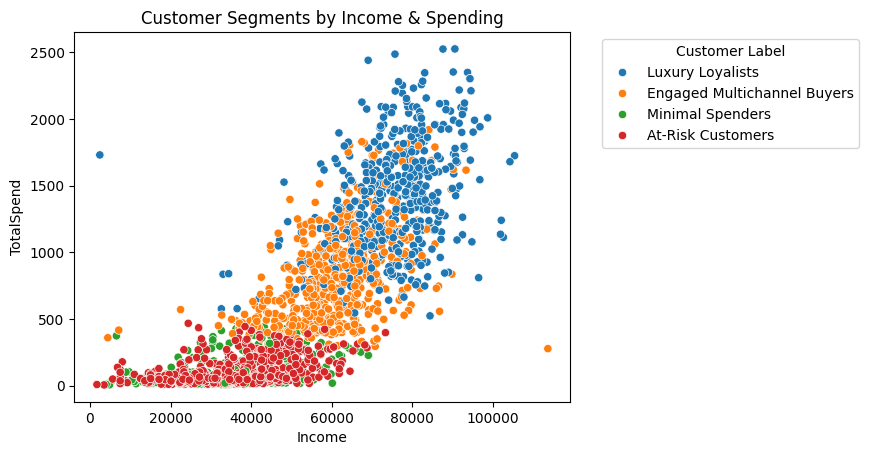

In [ ]:


sns.scatterplot(data=df, x='Income', y='TotalSpend', hue='ClusterLabel', palette='tab10')
plt.title("Customer Segments by Income & Spending")
plt.legend(title="Customer Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
#customer preferred channel

df['TotalPurchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Share of each channel
df['WebShare'] = df['NumWebPurchases'] / df['TotalPurchases']
df['CatalogShare'] = df['NumCatalogPurchases'] / df['TotalPurchases']
df['StoreShare'] = df['NumStorePurchases'] / df['TotalPurchases']

def preferred_channel(row):
    channels = {
        'Web': row['NumWebPurchases'],
        'Catalog': row['NumCatalogPurchases'],
        'Store': row['NumStorePurchases']
    }
    return max(channels, key=channels.get)

df['PreferredChannel'] = df.apply(preferred_channel, axis=1)

df

,Id,Year_Birth,age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,TotalChildren,TotalSpend,FamilyStatus,Cluster,ClusterLabel,TotalPurchases,WebShare,CatalogShare,StoreShare,PreferredChannel
0,1826,1970,52.0,Graduation,D,84835.000000,0,0,6/16/2014,0,...,0,1190,NoKids,1,Luxury Loyalists,14,0.285714,0.285714,0.428571,Store
1,1,1961,61.0,Graduation,S,57091.000000,0,0,6/15/2014,0,...,0,577,NoKids,2,Engaged Multichannel Buyers,17,0.411765,0.176471,0.411765,Web
2,10476,1958,64.0,Graduation,M,67267.000000,0,1,5/13/2014,0,...,1,251,WithKids,0,Minimal Spenders,10,0.300000,0.200000,0.500000,Store
3,1386,1967,55.0,Graduation,T,32474.000000,1,1,11/5/2014,0,...,2,11,WithKids,0,Minimal Spenders,3,0.333333,0.000000,0.666667,Store
4,5371,1989,33.0,Graduation,S,21474.000000,1,0,8/4/2014,0,...,1,91,WithKids,0,Minimal Spenders,6,0.500000,0.166667,0.333333,Web
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,5798,1973,49.0,Master,T,62770.029758,0,0,11/23/2013,87,...,0,985,NoKids,2,Engaged Multichannel Buyers,14,0.142857,0.285714,0.571429,Store
1981,2902,1958,64.0,Graduation,T,39068.989577,1,1,3/9/2012,87,...,2,45,WithKids,3,At-Risk Customers,4,0.250000,0.000000,0.750000,Store
2137,3117,1955,67.0,Graduation,S,50241.843294,0,1,10/18/2013,95,...,1,450,WithKids,2,Engaged Multichannel Buyers,12,0.500000,0.083333,0.416667,Web
2163,7244,1951,71.0,Graduation,S,42652.663078,2,1,1/1/2014,96,...,3,124,WithKids,3,At-Risk Customers,7,0.285714,0.142857,0.571429,Store


In [ ]:
# preferred channel dist
df.PreferredChannel.value_counts()

,count
PreferredChannel,
Store,1477
Web,596
Catalog,157


FamilyStatus        NoKids  WithKids
PreferredChannel                    
Catalog           0.176656  0.028195
Store             0.676656  0.656642
Web               0.146688  0.315163


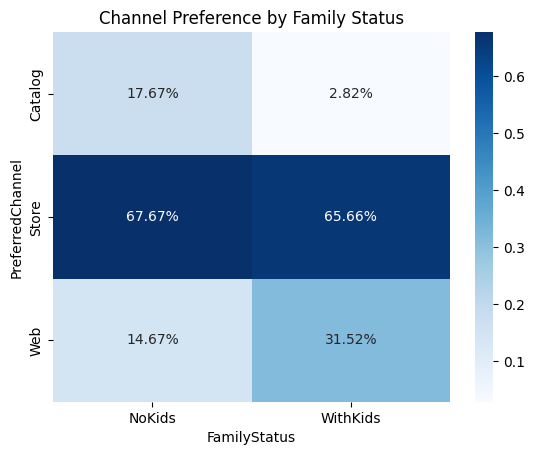

In [ ]:
# Channel preference by family status(with/no kids)
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']
df['FamilyStatus'] = df['TotalChildren'].apply(lambda x: 'NoKids' if x == 0 else 'WithKids')

channel_family = pd.crosstab(df['PreferredChannel'], df['FamilyStatus'], normalize='columns')
print(channel_family)

sns.heatmap(channel_family, annot=True, cmap='Blues', fmt='.2%')
plt.title("Channel Preference by Family Status")
plt.show()

<ipython-input-252-fdd27ff30e72>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='PreferredChannel', order=['Store', 'Web', 'Catalog'], palette='Set2')


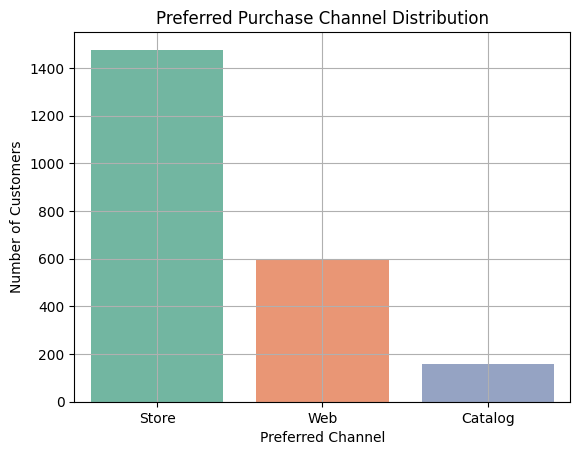

In [ ]:
#preferred channel comparison
sns.countplot(data=df, x='PreferredChannel', order=['Store', 'Web', 'Catalog'], palette='Set2')
plt.title("Preferred Purchase Channel Distribution")
plt.ylabel("Number of Customers")
plt.xlabel("Preferred Channel")
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Web Visits vs. Recency by Channel')

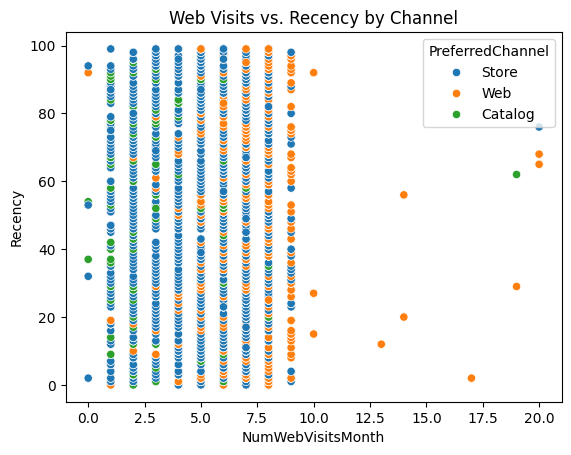

In [ ]:

# spotting patterns in digital behavior and purchase recency for different customer segments.



sns.scatterplot(data=df, x='NumWebVisitsMonth', y='Recency', hue='PreferredChannel')
plt.title("Web Visits vs. Recency by Channel")


In [ ]:
#web conversion rate per customer(0-1)

# Avoid divide-by-zero issues
df['WebConversionRate'] = df.apply(
    lambda row: row['NumWebPurchases'] / row['NumWebVisitsMonth']
    if row['NumWebVisitsMonth'] > 0 else 0,
    axis=1
)

# Summary
conversion_summary = df.groupby('PreferredChannel')['WebConversionRate'].agg(['mean', 'median', 'count']).round(2)
print("Web Conversion Rate by Preferred Channel:\n")
print(conversion_summary)


Web Conversion Rate by Preferred Channel:

                  mean  median  count
PreferredChannel                     
Catalog           1.91    1.75    157
Store             0.99    0.50   1477
Web               1.12    0.86    596


In [ ]:
# CATALOG segment is very high average conversion rate, catalog-preferring customers often buy every time they visit
# the website — and even more than once on average. Even though they prefer catalogs, when they go online,
# they're serious buyers.

# STORE segment is lower average, low-to-medium conversion  ; on average 1 purchase per month per 1 online visit and is large group,
# but with mixed online engagement.This group is still active online, but prefers in-person shopping.

# WEB segment has solid conversion and responsive audience, better than Store, slightly lower than Catalog,
# many convert at least once per visit.


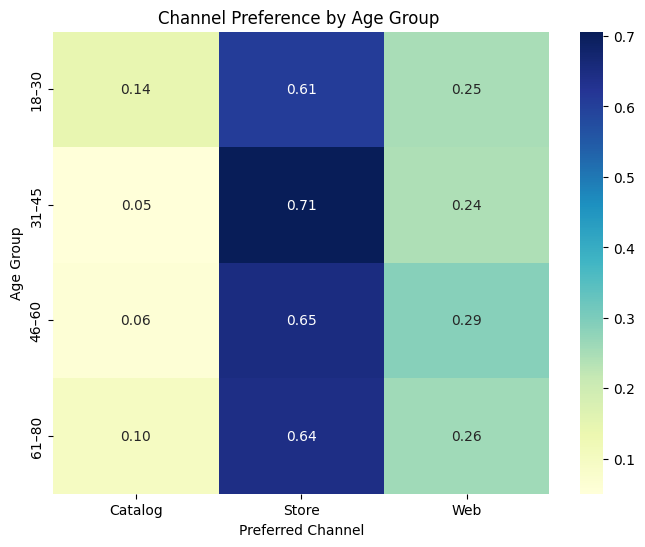

In [ ]:
# analyzing age groups' preferred purchase channel

df['AgeGroup'] = pd.cut(df['age'], bins=[18, 30, 45, 60, 80], labels=['18–30', '31–45', '46–60', '61–80'])

max_income = df['Income'].max()+1
df['IncomeGroup'] = pd.cut(df['Income'], bins=[0, 30000, 60000, 90000, 120000, 200000],
                           labels=['<30k', '30–60k', '60–90k', '90–120k', '120k+'])

pivot_table = pd.crosstab(index=df['AgeGroup'],
                          columns=df['PreferredChannel'],
                          values=df['Income'],
                          aggfunc='count',
                          normalize='index')

# plot
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title("Channel Preference by Age Group ")
plt.ylabel("Age Group")
plt.xlabel("Preferred Channel")
plt.show()


In [ ]:
df

,Id,Year_Birth,age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Cluster,ClusterLabel,TotalPurchases,WebShare,CatalogShare,StoreShare,PreferredChannel,WebConversionRate,AgeGroup,IncomeGroup
0,1826,1970,52.0,Graduation,D,84835.000000,0,0,6/16/2014,0,...,1,Luxury Loyalists,14,0.285714,0.285714,0.428571,Store,4.000000,46–60,60–90k
1,1,1961,61.0,Graduation,S,57091.000000,0,0,6/15/2014,0,...,2,Engaged Multichannel Buyers,17,0.411765,0.176471,0.411765,Web,1.400000,61–80,30–60k
2,10476,1958,64.0,Graduation,M,67267.000000,0,1,5/13/2014,0,...,0,Minimal Spenders,10,0.300000,0.200000,0.500000,Store,1.500000,61–80,60–90k
3,1386,1967,55.0,Graduation,T,32474.000000,1,1,11/5/2014,0,...,0,Minimal Spenders,3,0.333333,0.000000,0.666667,Store,0.142857,46–60,30–60k
4,5371,1989,33.0,Graduation,S,21474.000000,1,0,8/4/2014,0,...,0,Minimal Spenders,6,0.500000,0.166667,0.333333,Web,0.428571,31–45,<30k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,5798,1973,49.0,Master,T,62770.029758,0,0,11/23/2013,87,...,2,Engaged Multichannel Buyers,14,0.142857,0.285714,0.571429,Store,2.000000,46–60,60–90k
1981,2902,1958,64.0,Graduation,T,39068.989577,1,1,3/9/2012,87,...,3,At-Risk Customers,4,0.250000,0.000000,0.750000,Store,0.200000,61–80,30–60k
2137,3117,1955,67.0,Graduation,S,50241.843294,0,1,10/18/2013,95,...,2,Engaged Multichannel Buyers,12,0.500000,0.083333,0.416667,Web,0.857143,61–80,30–60k
2163,7244,1951,71.0,Graduation,S,42652.663078,2,1,1/1/2014,96,...,3,At-Risk Customers,7,0.285714,0.142857,0.571429,Store,0.333333,61–80,30–60k


In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Assuming df contains your customer data with Mnt* columns and TotalPurchases
customer_ids = df['Id'].unique()
np.random.seed(42)

# Define category-to-product mapping
product_categories = {
    "Wine": ["Cabernet Sauvignon", "Merlot", "Pinot Noir", "Chardonnay", "Sauvignon Blanc", "Rosé", "Syrah", "Malbec"],
    "Fruit": ["Red Apples", "Bananas", "Blueberries", "Oranges", "Mangoes", "Strawberries", "Pineapple", "Grapes"],
    "Meat": ["Ribeye Steak", "Chicken Breast", "Pork Chops", "Ground Beef", "Turkey Slices", "Lamb Chops", "Sausages", "Bacon"],
    "Fish": ["Salmon Fillet", "Tuna Steak", "Cod Filet", "Shrimp Pack", "Crab Legs", "Sardines", "Mackerel", "Lobster Tail"],
    "Sweets": ["Chocolate Bar", "Gummy Bears", "Brownie Pack", "Cupcakes", "Candy Cane", "Caramel Fudge", "Lollipop Box", "Jelly Beans"],
    "Gold": ["Gold Ring", "Gold Necklace", "Gold Earrings", "Gold Bracelet", "Gold Coin", "Gold Pendant", "Gold Watch", "Gold Chain"]
}

# Calculate total spending for each category in df
category_spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['TotalSpend'] = df[category_spending_columns].sum(axis=1)

# Normalize spending in each category relative to total spending
category_proportions = df[category_spending_columns].div(df['TotalSpend'], axis=0)

locations = ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix",
             "Philadelphia", "San Antonio", "San Diego", "Dallas", "San Jose"]

# Assign a location to each customer
customer_location_map = {
    cust_id: random.choice(locations) for cust_id in df['Id'].unique()
}



# Generate purchase records
purchase_records = []
for cust_id in customer_ids:
    customer_data = df[df['Id'] == cust_id]

    # Get the total purchases for the customer
    total_purchases = customer_data['TotalPurchases'].values[0]

    # Generate purchases based on the proportion of spending in each category
    category_purchases = {
        "Wine": "MntWines",
        "Fruit": "MntFruits",
        "Meat": "MntMeatProducts",
        "Fish": "MntFishProducts",
        "Sweets": "MntSweetProducts",
        "Gold": "MntGoldProds"
    }

    for category, spending_column in category_purchases.items():
        # Get the proportion of spending for this category
        category_share = customer_data[spending_column].values[0] / customer_data['TotalSpend'].values[0]

        # Calculate the number of purchases in this category (proportional to the customer's spending in that category)
        num_purchases_for_category = int(total_purchases * category_share)

        # Generate purchases for this category
        for _ in range(num_purchases_for_category):
            product = random.choice(product_categories[category])
            purchase_date = datetime(2025, 4, 1) + timedelta(days=random.randint(0, 28), hours=random.randint(0, 23))
            order_date = purchase_date.date()
            shipment_date = order_date + timedelta(days=random.randint(1, 7))

            # Purchase amount within a certain range
            amount = round(random.uniform(10, 500), 2)
            quantity = random.randint(1, 5)

            # Preferred channel (randomly assign based on the proportion of usage)
            preferred_channel = random.choice(['Web', 'Catalog', 'Store'])

            location = customer_location_map[cust_id]  # Use consistent location


            purchase_records.append({
                "CustomerID": cust_id,
                "Category": category,
                "ProductName": product,
                "PurchaseTime": purchase_date,
                "PurchaseAmount": amount,
                "Quantity": quantity,
                "TotalPrice": round(amount * quantity, 2),
                "Returned": random.choices([0, 1], weights=[95, 5])[0],
                "OrderDate": order_date,
                "ShipmentDate": shipment_date,
                "Location": random.choice(locations),
                "Feedback": random.choices(["Excellent", "Good", "Neutral", "Poor", "Terrible"], weights=[40, 30, 15, 10, 5])[0],
                "PreferredChannel": preferred_channel
            })

# Convert to DataFrame
purchase_df = pd.DataFrame(purchase_records)
purchase_df["PurchaseID"] = range(1, len(purchase_df) + 1)



In [ ]:
purchase_df

,CustomerID,Category,ProductName,PurchaseTime,PurchaseAmount,Quantity,TotalPrice,Returned,OrderDate,ShipmentDate,Location,Feedback,PreferredChannel,PurchaseID
0,1826,Wine,Merlot,2025-04-25 11:00:00,457.17,5,2285.85,0,2025-04-25,2025-05-01,San Antonio,Excellent,Web,1
1,1826,Wine,Sauvignon Blanc,2025-04-15 15:00:00,205.00,1,205.00,0,2025-04-15,2025-04-20,Chicago,Good,Catalog,2
2,1826,Fruit,Blueberries,2025-04-11 03:00:00,189.11,4,756.44,0,2025-04-11,2025-04-12,San Antonio,Good,Web,3
3,1826,Meat,Turkey Slices,2025-04-06 08:00:00,460.60,3,1381.80,0,2025-04-06,2025-04-10,San Diego,Excellent,Store,4
4,1826,Meat,Pork Chops,2025-04-18 11:00:00,217.71,3,653.13,0,2025-04-18,2025-04-20,San Jose,Good,Web,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22571,1295,Meat,Turkey Slices,2025-04-27 22:00:00,314.16,3,942.48,0,2025-04-27,2025-04-30,San Diego,Neutral,Store,22572
22572,1295,Sweets,Candy Cane,2025-04-10 06:00:00,101.68,4,406.72,0,2025-04-10,2025-04-14,Los Angeles,Good,Store,22573
22573,1295,Gold,Gold Earrings,2025-04-22 18:00:00,328.07,4,1312.28,0,2025-04-22,2025-04-25,San Jose,Neutral,Catalog,22574
22574,1295,Gold,Gold Pendant,2025-04-21 18:00:00,114.49,2,228.98,0,2025-04-21,2025-04-22,Dallas,Excellent,Web,22575


In [ ]:
# Move PurchaseID to the front
cols = ['PurchaseID'] + [col for col in purchase_df.columns if col != 'PurchaseID']
purchase_df = purchase_df[cols]

purchase_df = purchase_df.sample(frac=1, random_state=42).reset_index(drop=True)

purchase_df


,PurchaseID,CustomerID,Category,ProductName,PurchaseTime,PurchaseAmount,Quantity,TotalPrice,Returned,OrderDate,ShipmentDate,Location,Feedback,PreferredChannel
0,19145,1065,Meat,Chicken Breast,2025-04-23 16:00:00,375.13,1,375.13,0,2025-04-23,2025-04-30,San Antonio,Excellent,Web
1,15376,7712,Wine,Pinot Noir,2025-04-16 13:00:00,354.17,3,1062.51,0,2025-04-16,2025-04-17,Dallas,Good,Store
2,12625,4381,Wine,Merlot,2025-04-14 04:00:00,362.16,3,1086.48,0,2025-04-14,2025-04-20,Philadelphia,Good,Store
3,1312,8920,Wine,Merlot,2025-04-01 14:00:00,410.85,2,821.70,0,2025-04-01,2025-04-03,Phoenix,Excellent,Web
4,9318,10581,Wine,Merlot,2025-04-22 10:00:00,175.01,3,525.03,0,2025-04-22,2025-04-29,Los Angeles,Excellent,Web
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22571,11965,3900,Wine,Syrah,2025-04-22 07:00:00,308.02,2,616.04,0,2025-04-22,2025-04-25,Chicago,Neutral,Store
22572,21576,7987,Wine,Chardonnay,2025-04-06 06:00:00,316.09,5,1580.45,0,2025-04-06,2025-04-13,Los Angeles,Excellent,Catalog
22573,5391,5329,Wine,Chardonnay,2025-04-02 16:00:00,313.83,3,941.49,0,2025-04-02,2025-04-09,Chicago,Excellent,Store
22574,861,9970,Meat,Bacon,2025-04-25 18:00:00,324.40,4,1297.60,0,2025-04-25,2025-04-26,Houston,Good,Web


In [ ]:
df

,Id,Year_Birth,age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Cluster,ClusterLabel,TotalPurchases,WebShare,CatalogShare,StoreShare,PreferredChannel,WebConversionRate,AgeGroup,IncomeGroup
0,1826,1970,52.0,Graduation,D,84835.000000,0,0,6/16/2014,0,...,1,Luxury Loyalists,14,0.285714,0.285714,0.428571,Store,4.000000,46–60,60–90k
1,1,1961,61.0,Graduation,S,57091.000000,0,0,6/15/2014,0,...,2,Engaged Multichannel Buyers,17,0.411765,0.176471,0.411765,Web,1.400000,61–80,30–60k
2,10476,1958,64.0,Graduation,M,67267.000000,0,1,5/13/2014,0,...,0,Minimal Spenders,10,0.300000,0.200000,0.500000,Store,1.500000,61–80,60–90k
3,1386,1967,55.0,Graduation,T,32474.000000,1,1,11/5/2014,0,...,0,Minimal Spenders,3,0.333333,0.000000,0.666667,Store,0.142857,46–60,30–60k
4,5371,1989,33.0,Graduation,S,21474.000000,1,0,8/4/2014,0,...,0,Minimal Spenders,6,0.500000,0.166667,0.333333,Web,0.428571,31–45,<30k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,5798,1973,49.0,Master,T,62770.029758,0,0,11/23/2013,87,...,2,Engaged Multichannel Buyers,14,0.142857,0.285714,0.571429,Store,2.000000,46–60,60–90k
1981,2902,1958,64.0,Graduation,T,39068.989577,1,1,3/9/2012,87,...,3,At-Risk Customers,4,0.250000,0.000000,0.750000,Store,0.200000,61–80,30–60k
2137,3117,1955,67.0,Graduation,S,50241.843294,0,1,10/18/2013,95,...,2,Engaged Multichannel Buyers,12,0.500000,0.083333,0.416667,Web,0.857143,61–80,30–60k
2163,7244,1951,71.0,Graduation,S,42652.663078,2,1,1/1/2014,96,...,3,At-Risk Customers,7,0.285714,0.142857,0.571429,Store,0.333333,61–80,30–60k


In [ ]:
full_data = pd.merge(purchase_df, df, left_on='CustomerID', right_on='Id', how='left')

full_data.columns

Index(['PurchaseID', 'CustomerID', 'Category', 'ProductName', 'PurchaseTime',
       'PurchaseAmount', 'Quantity', 'TotalPrice', 'Returned', 'OrderDate',
       'ShipmentDate', 'Location', 'Feedback', 'PreferredChannel_x', 'Id',
       'Year_Birth', 'age', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'educ_numeric', 'TotalChildren', 'TotalSpend',
       'FamilyStatus', 'Cluster', 'ClusterLabel', 'TotalPurchases', 'WebShare',
       'CatalogShare', 'StoreShare', 'PreferredChannel_y', 'WebConversionRate',
       'AgeGroup', 'IncomeGroup'],
      dtype='object')

In [ ]:
missing_agegroup_rows = full_data[full_data['AgeGroup'].isna()]
print(missing_agegroup_rows[['age','AgeGroup']])

        age AgeGroup
281    81.0      NaN
775    82.0      NaN
873    81.0      NaN
1072   82.0      NaN
1394   81.0      NaN
3658   81.0      NaN
4111   81.0      NaN
4177   82.0      NaN
4756   81.0      NaN
4900   81.0      NaN
5034   82.0      NaN
7351   81.0      NaN
8349   81.0      NaN
10991  81.0      NaN
11031  81.0      NaN
11106  81.0      NaN
12486  82.0      NaN
12570  81.0      NaN
12653  81.0      NaN
12802  81.0      NaN
15392  81.0      NaN
16196  81.0      NaN
16871  81.0      NaN
17155  81.0      NaN
19005  82.0      NaN
20001  82.0      NaN
20433  81.0      NaN


In [ ]:
# # Define bins and labels
# bins = [18, 30, 45, 60, 80]
# labels = ['18–30', '31–45', '46–60', '61–80']

# # Apply binning to the 'age' column
# missing_agegroup_rows['AgeGroup'] = pd.cut(missing_agegroup_rows['age'], bins=bins, labels=labels, right=True, include_lowest=True)

# # Check if all age groups are filled
# missing_agegroup_rows['AgeGroup'].isna().sum()


# Define bins and labels
bins = [18, 30, 45, 60, 85]
labels = ['18–30', '31–45', '46–60', '61–85']

# Create a new column for the age group labels
full_data['AgeGroup'] = pd.cut(full_data['age'], bins=bins, labels=labels, right=False)

# Now, 'AgeGroup' contains the labels, and 'age' still has the original values



In [ ]:
full_data.isna().sum()

,0
PurchaseID,0
CustomerID,0
Category,0
ProductName,0
PurchaseTime,0
PurchaseAmount,0
Quantity,0
TotalPrice,0
Returned,0
OrderDate,0


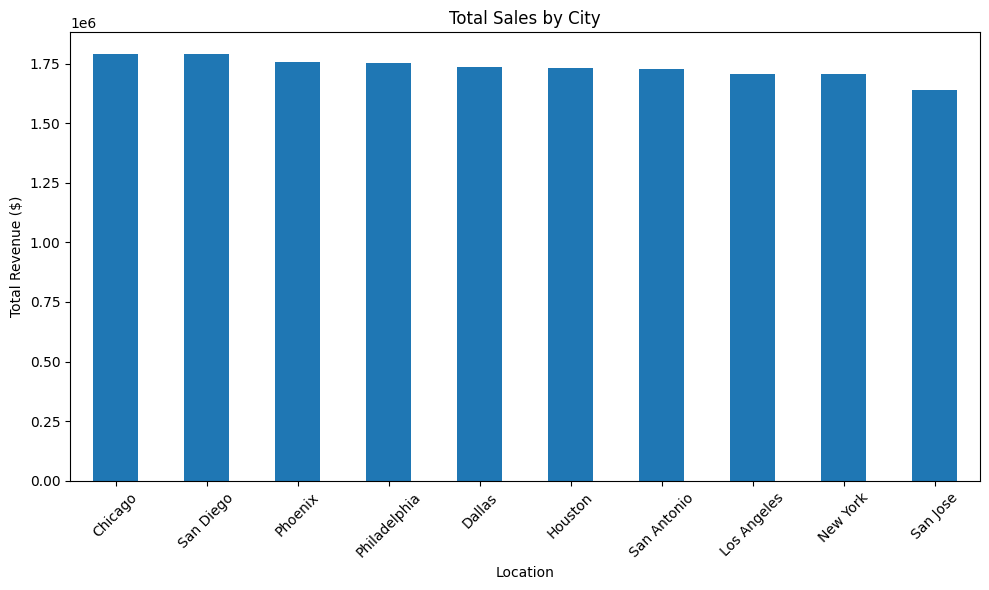

In [ ]:
city_sales = full_data.groupby("Location")["TotalPrice"].sum().sort_values(ascending=False)
city_sales.plot(kind='bar', figsize=(10,6), title="Total Sales by City", ylabel="Total Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


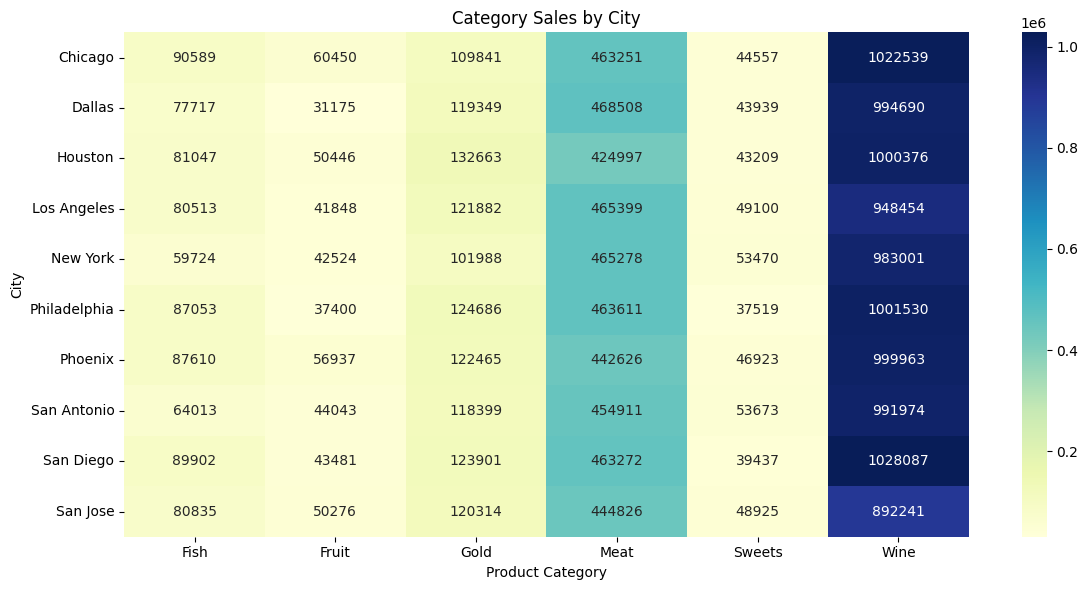

In [ ]:
import seaborn as sns

# Create a pivot table of total sales by Location and Category
location_category_sales = full_data.pivot_table(
    index='Location',
    columns='Category',
    values='TotalPrice',
    aggfunc='sum',
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(location_category_sales, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Category Sales by City")
plt.ylabel("City")
plt.xlabel("Product Category")
plt.tight_layout()
plt.show()


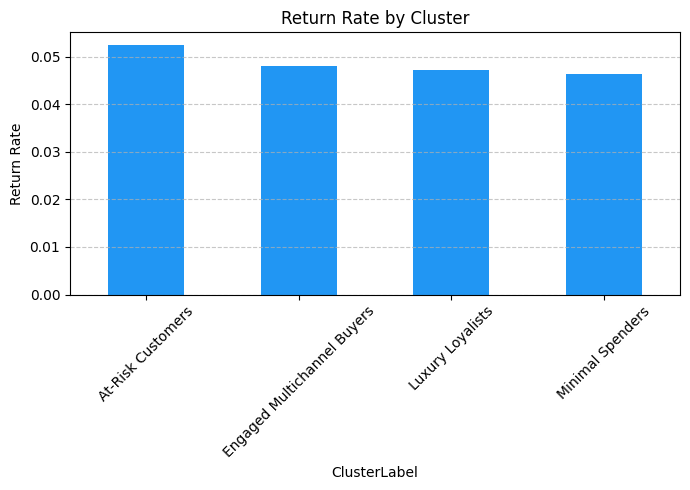

In [ ]:
# Return rate by cluster
return_rate = full_data.groupby("ClusterLabel")["Returned"].mean().sort_values(ascending=False)

return_rate.plot(kind='bar', color='#2196F3', figsize=(7,5))
plt.title("Return Rate by Cluster")
plt.ylabel("Return Rate")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


In [ ]:
full_data.Feedback.value_counts()

,count
Feedback,
Excellent,8996
Good,6868
Neutral,3372
Poor,2228
Terrible,1112


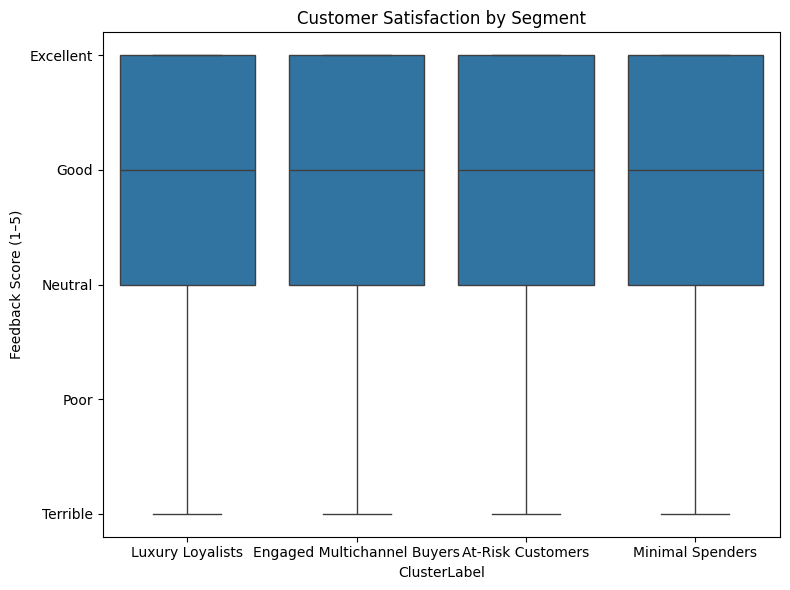

In [ ]:

# Box plot of satisfaction
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(data=full_data, x="ClusterLabel", y="Feedback")
plt.title("Customer Satisfaction by Segment")
plt.ylabel("Feedback Score (1–5)")
plt.tight_layout()
plt.show()


In [ ]:
full_data.columns

Index(['PurchaseID', 'CustomerID', 'Category', 'ProductName', 'PurchaseTime',
       'PurchaseAmount', 'Quantity', 'TotalPrice', 'Returned', 'OrderDate',
       'ShipmentDate', 'Location', 'Feedback', 'PreferredChannel_x', 'Id',
       'Year_Birth', 'age', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'educ_numeric', 'TotalChildren', 'TotalSpend',
       'FamilyStatus', 'Cluster', 'ClusterLabel', 'TotalPurchases', 'WebShare',
       'CatalogShare', 'StoreShare', 'PreferredChannel_y', 'WebConversionRate',
       'AgeGroup', 'IncomeGroup'],
      dtype='object')